In [1]:
import numpy as np
import matplotlib.pyplot as plt

OpenCV is the huge open-source library for the computer vision, 
machine learning, and image processing and now it plays a major 
role in real-time operation which is very important in today's systems.
By using it, one can process images and videos to identify objects, faces, 
or even handwriting of a human

In [2]:
import cv2

Methods for membership matrix , centroid calculation and updating membership matrix

In [3]:
def init_membership_mat(nb_pixels, nb_clusters):
    membership_mat = np.zeros((nb_pixels, nb_clusters))
    x = np.arange(nb_pixels)
    for j in range(nb_clusters):
        xj = x % nb_clusters == j
        membership_mat[xj, j] = 1

    return membership_mat

#centroid of a cluster is he mean of all points, weighted by their degree of belonging to the cluster:
def compute_centers(img_mat, membership_mat, fuzzy):
    #matrix multiplication
    num = np.dot(img_mat, membership_mat ** fuzzy)
    dem = np.sum(membership_mat ** fuzzy, axis=0)

    return num / dem


def update_membership_mat(ctr_mat, img_mat, fuzzy):
#The numpy.meshgrid function is used to create a rectangular grid out of 
#two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing.    
#Return coordinate matrices from coordinate vectors    
    ctr_mat_mesh, img_mat_mesh = np.meshgrid(ctr_mat, img_mat)
    power = 2. / (fuzzy - 1)
    p1 = abs(img_mat_mesh - ctr_mat_mesh) ** power
    p2 = np.sum((1. / abs(img_mat_mesh - ctr_mat_mesh)) ** power, axis=1)

    return 1. / (p1 * p2[:, None])


cv2.cvtColor() method is used to convert an image from one color space to another

Using cv2.COLOR_BGR2GRAY color space
convert our original image from the BGR color space to gray (BGR :Blue,Green,red)
BGR stands for Blue(255, 0, 0), Green(0, 255, 0), Red(0, 0, 255). OpenCV uses BGR color as a 
default color space to display images 

In [4]:
#Read the image
src = cv2.imread("cameraman.png")
#src = cv2.imread("peppers.png")

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
plt.show()

# Number of clusters
K = 3

# Number of data/pixels
N = gray.size

# Fuzzyness coefficient
#The parameter m is a real number greater than 1 (1.0<m<∞) and it defines the level of cluster 
#fuzziness. Note that, a value of m close to 1 gives a cluster solution which becomes increasingly 
#similar to the solution of hard clustering such as k-means; whereas a value of m close to infinite leads to complete fuzzyness
m = 2

# Threshold
eps = 0.3

# Maximum number of iterations
max_i = 100

# Initialization
#Flattening is a technique that is used to convert multi-dimensional arrays into a 1-D array,helps in 
#decreasing the memory as well as reducing the time to train the model.
X = gray.flatten().astype('float')
U = init_membership_mat(N, K)

# Repeat until convergence
i = 0
while True:
    # Compute centroid for each cluster
    C = compute_centers(X, U, m)

    # Save initial membership matrix
    old_U = np.copy(U)

    # Update coefficients for each pixel
    U = update_membership_mat(C, X, m)

    # Difference between initial mem matrix and new one
    d = np.sum(abs(U - old_U))
    print(str(i) + " - d "+ str(d))

    # Check convergence
    if d < eps or i > max_i:
        break
    i += 1


0 - d 87384.33937077608
1 - d 1228.9688562269228
2 - d 3613.227293038942
3 - d 10041.800193134215
4 - d 19088.89407120637
5 - d 26468.301446423662
6 - d 29737.512970975487
7 - d 19761.580764343766
8 - d 9842.96338567754
9 - d 4057.0004158645565
10 - d 2026.1464451000527
11 - d 1188.0203596032263
12 - d 717.9440530613203
13 - d 431.25080408831053
14 - d 257.69953318077177
15 - d 153.6734023593582
16 - d 91.6024471887569
17 - d 54.59543849681358
18 - d 32.537988523392926
19 - d 19.392357842226783
20 - d 11.557902511918194
21 - d 6.8886535927577395
22 - d 4.105768339297357
23 - d 2.447133282493379
24 - d 1.4585547041385396
25 - d 0.8693386817980148
26 - d 0.5181505351701597
27 - d 0.3088327936974259
28 - d 0.1840734117786052


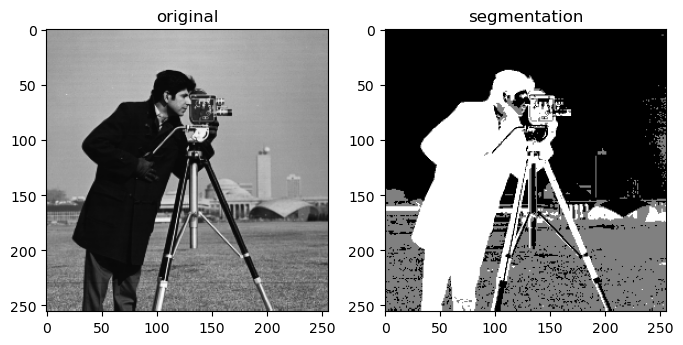

In [5]:
# Segmentation
#The numpy.argmax() function returns indices of the max element of the array in a particular axis. 
seg = np.argmax(U, axis=1)

#Reshaping means changing the shape of an array.
#The shape of an array is the number of elements in each dimension.
seg = seg.reshape(gray.shape).astype('int')

# Plot
fig = plt.figure(figsize=(8, 4), dpi=100)

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
ax1.set_title('original')

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(seg, cmap="gray")
ax2.set_title('segmentation')

plt.show()